# Week 4

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# feature engineering, selection + preprocessing tools
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import RareLabelEncoder, OrdinalEncoder
from feature_engine.imputation import MeanMedianImputer
from sklearn.feature_selection import mutual_info_classif, SelectKBest


# models
import xgboost as xgb
from pycaret.regression import *
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# metrics
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score

In [5]:
plt.style.use('default')
plt.rcdefaults()
plt.style.use('default')

## 1. Regression

### 1.1 Age of a Fossil Dataset

In [6]:
df = pd.read_csv('dataset/1. regression/Age_Fossil.csv')
df.head(10)

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
0,0.738061,0.487707,0.907884,91.17,Cretaceous,Normal polarity,False,0.915951,Conglomerate,Middle,50.65,432.00,43523
1,0.560096,0.341738,1.121302,165.44,Cambrian,Normal polarity,False,0.803968,Limestone,Top,48.85,353.29,44112
2,0.424773,0.218493,0.103855,218.98,Cambrian,Normal polarity,True,0.792441,Shale,Bottom,37.66,371.33,43480
3,0.349958,0.704649,0.383617,51.09,Permian,Normal polarity,True,0.074636,Limestone,Bottom,39.10,232.84,30228
4,0.886811,0.777494,0.593254,313.72,Devonian,Normal polarity,True,1.646640,Shale,Top,90.84,277.67,67217
5,1.079099,0.589527,0.573466,164.37,Jurassic,Normal polarity,True,1.391573,Limestone,Bottom,51.89,312.85,77800
6,0.467579,0.657890,0.205170,197.56,Cambrian,Normal polarity,True,0.514012,Limestone,Bottom,43.12,426.17,47130
7,0.344964,0.872661,0.688772,136.40,Neogene,Normal polarity,True,0.003672,Conglomerate,Bottom,96.82,454.15,35982
8,0.407311,0.793969,0.184602,103.81,Devonian,Normal polarity,True,0.690427,Conglomerate,Top,44.56,208.19,30105
9,0.302639,0.028225,0.338870,215.61,Cambrian,Normal polarity,True,0.016493,Sandstone,Middle,98.64,157.63,28568


In [7]:
# function to check missing & duplicated values
def check_data(df):
    print('-' *50)
    
    missing_data = df.isnull().sum().sum()
    
    print(f'There are {missing_data} missing values in the dataset.')
    print(f'There are {df.duplicated().sum().sum()} duplicated values in the dataset.')
    print('-' *50)
    
    if missing_data > 0:
        print('Missing values:')
        print(df.isnull().sum().sort_values(ascending=False))
        print('-' *50)

In [8]:
check_data(df)

--------------------------------------------------
There are 0 missing values in the dataset.
There are 0 duplicated values in the dataset.
--------------------------------------------------


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uranium_lead_ratio          4398 non-null   float64
 1   carbon_14_ratio             4398 non-null   float64
 2   radioactive_decay_series    4398 non-null   float64
 3   stratigraphic_layer_depth   4398 non-null   float64
 4   geological_period           4398 non-null   object 
 5   paleomagnetic_data          4398 non-null   object 
 6   inclusion_of_other_fossils  4398 non-null   bool   
 7   isotopic_composition        4398 non-null   float64
 8   surrounding_rock_type       4398 non-null   object 
 9   stratigraphic_position      4398 non-null   object 
 10  fossil_size                 4398 non-null   float64
 11  fossil_weight               4398 non-null   float64
 12  age                         4398 non-null   int64  
dtypes: bool(1), float64(7), int64(1),

In [10]:
num_cols = [var for var in df.columns if df[var].dtype != 'object' ]
num_cols

['uranium_lead_ratio',
 'carbon_14_ratio',
 'radioactive_decay_series',
 'stratigraphic_layer_depth',
 'inclusion_of_other_fossils',
 'isotopic_composition',
 'fossil_size',
 'fossil_weight',
 'age']

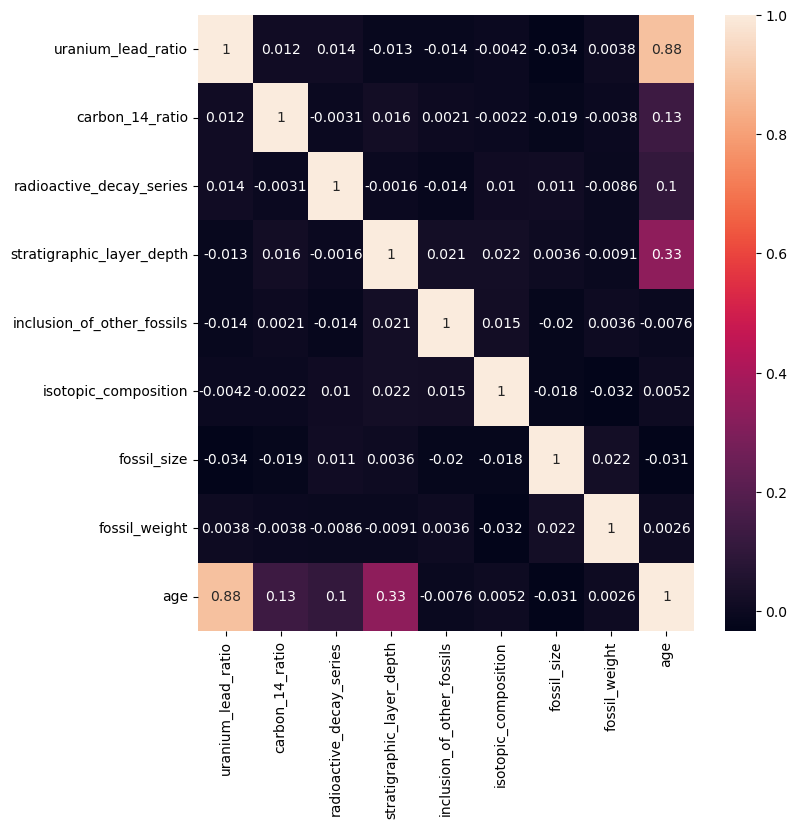

In [11]:
# feature correlation
corr = df[num_cols].corr()

# heatmap
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True)
plt.show()

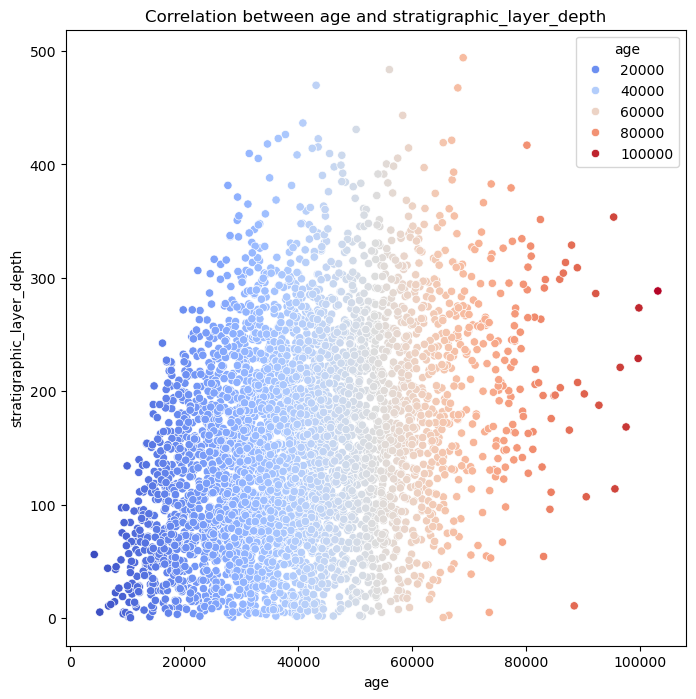

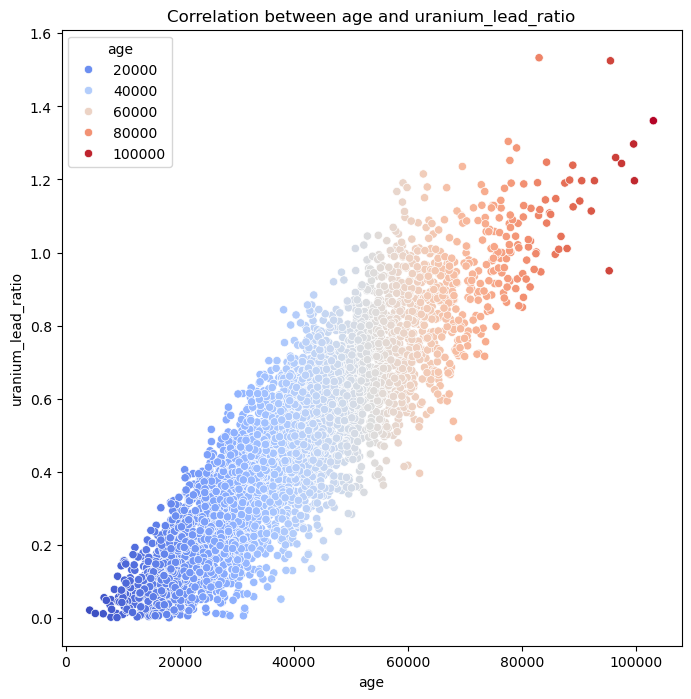

In [12]:
cols = ['stratigraphic_layer_depth', 'uranium_lead_ratio']

for col in cols:
    plt.figure(figsize=(8,8))
    plt.title(f"Correlation between age and {col}")
    sns.scatterplot(data=df, x='age', y=col, hue='age', palette='coolwarm')
    plt.show()

Looking at outliers

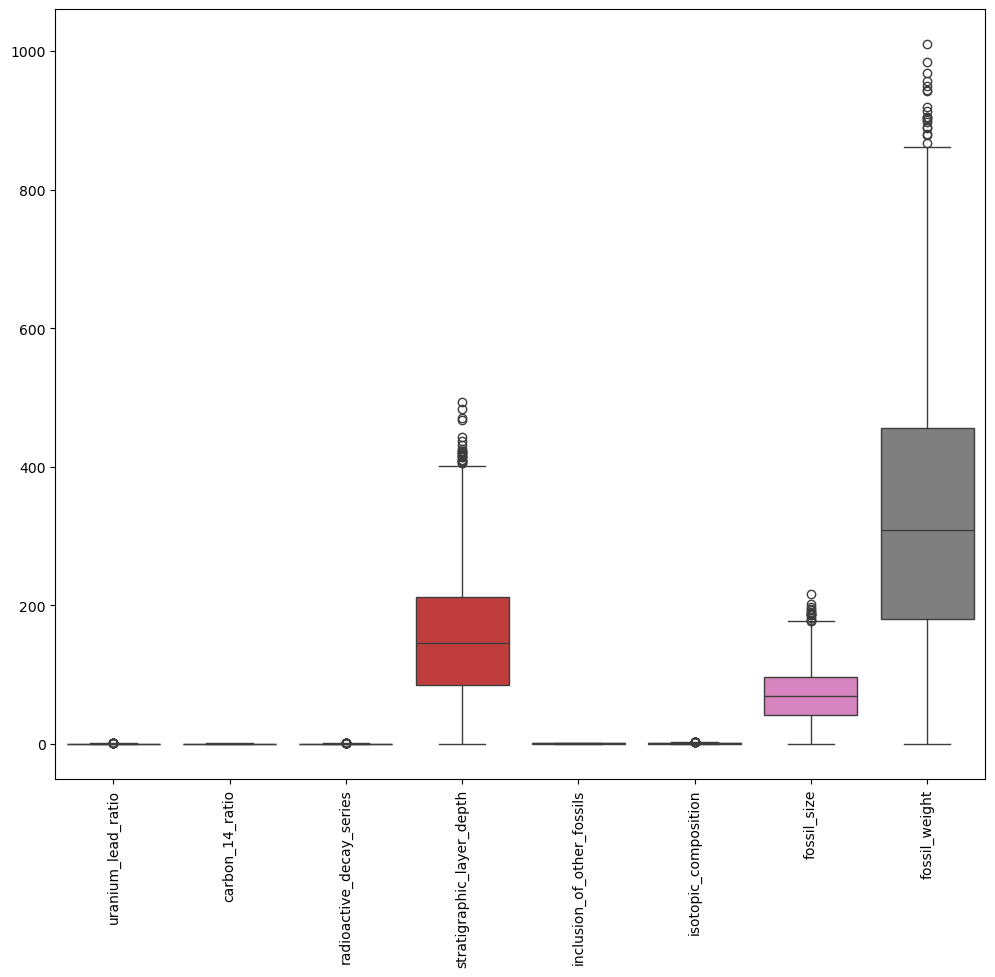

In [13]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df[num_cols].iloc[:,:-1])
plt.xticks(rotation=90)
plt.show()

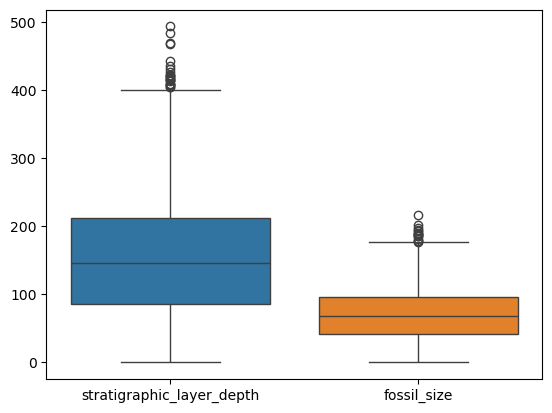

In [14]:
sns.boxplot(df[['stratigraphic_layer_depth', 'fossil_size']])
plt.show()

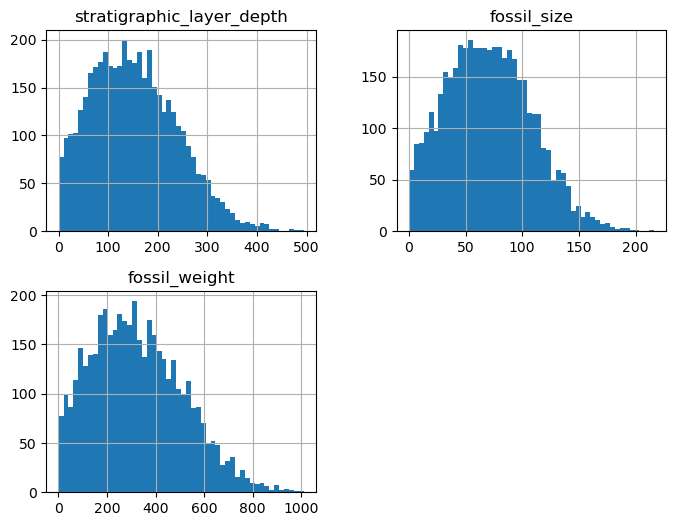

In [15]:
df[['stratigraphic_layer_depth', 'fossil_size', 'fossil_weight']].hist(bins=50,  figsize=(8, 6))
plt.show()

In [16]:
# apply winsorizer for 'stratigraphic_layer_depth' and 'fossil_size'

winsorizer = Winsorizer(
    capping_method='gaussian',
    fold='auto',
    variables= ['stratigraphic_layer_depth', 'fossil_size', 'fossil_weight']
)

df = winsorizer.fit_transform(df)

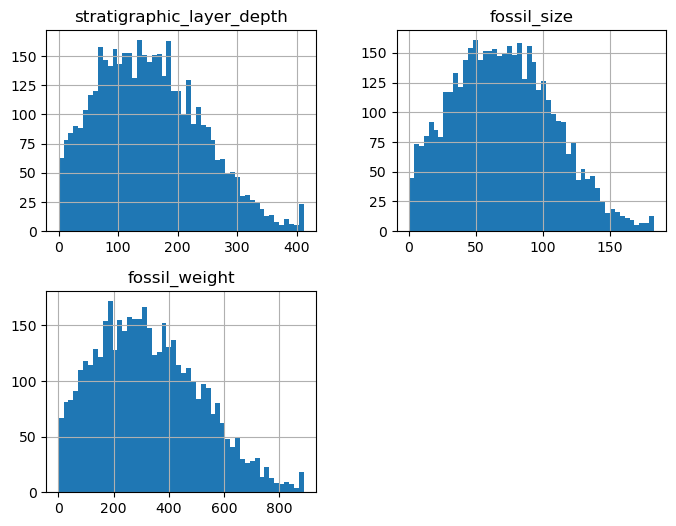

In [17]:
df[['stratigraphic_layer_depth', 'fossil_size', 'fossil_weight']].hist(bins=50,  figsize=(8, 6))
plt.show()

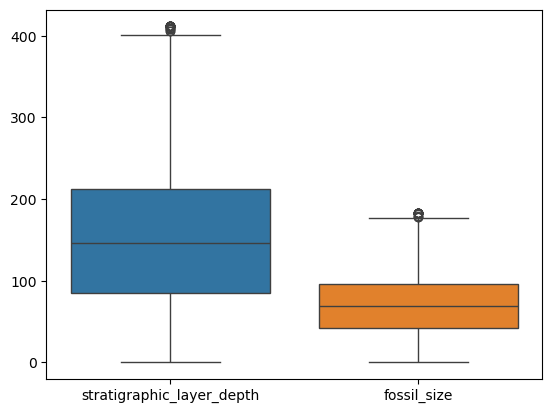

In [18]:
sns.boxplot(df[['stratigraphic_layer_depth', 'fossil_size']])
plt.show()

Training our model

In [19]:
X = df.drop('age', axis=1)
y = df['age']

X.shape, y.shape

((4398, 12), (4398,))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=0
)

X_train.shape, X_test.shape

((3298, 12), (1100, 12))

Apply Encoding

In [21]:
cat_cols = [var for var in df.columns if df[var].dtype == 'object']
cat_cols

['geological_period',
 'paleomagnetic_data',
 'surrounding_rock_type',
 'stratigraphic_position']

In [22]:
for col in cat_cols:
    print(f'-'*50)
    print(f'Column : {col}')
    print(X_train[col].value_counts())

--------------------------------------------------
Column : geological_period
geological_period
Cambrian         641
Triassic         502
Cretaceous       474
Devonian         374
Jurassic         362
Paleogene        298
Permian          274
Neogene          244
Ordovician        74
Carboniferous     44
Silurian          11
Name: count, dtype: int64
--------------------------------------------------
Column : paleomagnetic_data
paleomagnetic_data
Normal polarity      2385
Reversed polarity     913
Name: count, dtype: int64
--------------------------------------------------
Column : surrounding_rock_type
surrounding_rock_type
Sandstone       1126
Shale            870
Limestone        862
Conglomerate     440
Name: count, dtype: int64
--------------------------------------------------
Column : stratigraphic_position
stratigraphic_position
Bottom    1989
Middle     938
Top        371
Name: count, dtype: int64


- Apply Label Encoding for:
    - `paleomagnetic_data`
    - `surrounding_rock_type`
    - `stratigraphic_position`
    - `inclusion_of_other_fossils`

- Apply Label Encoding for:
    - `geological_period`

In [23]:
# Label encoding
label_encoder = LabelEncoder()

cols = ['stratigraphic_position',
        'paleomagnetic_data',
        'surrounding_rock_type',
        'inclusion_of_other_fossils',
        'geological_period']

for col in  cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

X_train

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight
1790,0.230313,0.863420,0.809607,103.510000,10,0,1,1.034709,2,1,87.85,444.66
4254,0.441949,0.149967,0.605375,160.710000,6,0,0,1.251031,1,1,75.56,229.04
2606,0.723783,0.608809,0.357955,170.470000,10,0,1,0.757229,3,2,72.84,347.29
1367,0.752105,0.244392,0.640759,151.340000,4,0,0,0.845869,1,0,93.94,342.72
3370,0.897276,0.842674,0.500087,243.470000,5,0,0,1.543463,3,0,7.55,68.50
...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0.385560,0.077780,0.545615,159.070000,8,1,1,1.100326,3,0,44.72,114.51
3264,0.350123,0.640462,1.030090,32.100000,0,1,0,0.795249,2,0,139.65,580.00
1653,0.270557,0.465944,0.341846,295.990000,6,0,0,0.181724,2,1,34.34,261.99
2607,0.385968,0.297719,0.680412,162.060000,10,0,0,0.541274,1,0,108.54,134.84


In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3298, 12), (1100, 12), (3298,), (1100,))

Training our models

In [25]:
models ={
    'Random Forest Regressor': RandomForestRegressor(random_state=0),
    'Decision Tree': DecisionTreeRegressor(random_state=0),
    'XGBoost':  xgb.XGBRegressor(random_state=0)
}

In [26]:
# Training set
result_train = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    
    mse = mean_squared_error(y_train, y_pred)
    mae = mean_absolute_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    rmse = np.sqrt(mse)
    
    result_train[name] = {
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'R^2 Score': r2,
        'Root Mean Squared Error': rmse
    }

In [27]:
comparison_df_train = pd.DataFrame(result_train).T
comparison_df_train.reset_index(inplace=True)
comparison_df_train.rename(columns={'index': 'Model'}, inplace=True)

In [28]:
# Test set
result_test = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    result_test[name] = {
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'R^2 Score': r2,
        'Root Mean Squared Error': rmse
    }

In [29]:
comparison_df_test = pd.DataFrame(result_test).T
comparison_df_test.reset_index(inplace=True)
comparison_df_test.rename(columns={'index': 'Model'}, inplace=True)

In [30]:
comparison_df_train

,Model,Mean Squared Error,Mean Absolute Error,R^2 Score,Root Mean Squared Error
0,Random Forest Regressor,919270.218777,737.127708,0.996019,958.785804
1,Decision Tree,0.000000,0.000000,1.000000,0.000000
2,XGBoost,139488.055689,276.266315,0.999396,373.480998


In [31]:
comparison_df_test

,Model,Mean Squared Error,Mean Absolute Error,R^2 Score,Root Mean Squared Error
0,Random Forest Regressor,6.952422e+06,2034.619418,0.969944,2636.744569
1,Decision Tree,1.493115e+07,3036.274545,0.935452,3864.084486
2,XGBoost,3.865073e+06,1526.732433,0.983291,1965.978787


- For **MSE**, **RMSE**, and **MAE**, lower values indicate better model performance.
- For **R^2 Score**, the higher the values indicate better model performance.

In [32]:
model_xgb =  xgb.XGBRegressor(random_state=0)
model_rf = RandomForestRegressor(random_state=0)
model_dec_tree = DecisionTreeRegressor(random_state=0)

model_xgb.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_dec_tree.fit(X_train, y_train)



y_pred_xgb = model_xgb.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_dec_tree = model_dec_tree.predict(X_test)

Visualizing Actual vs Predicted Value

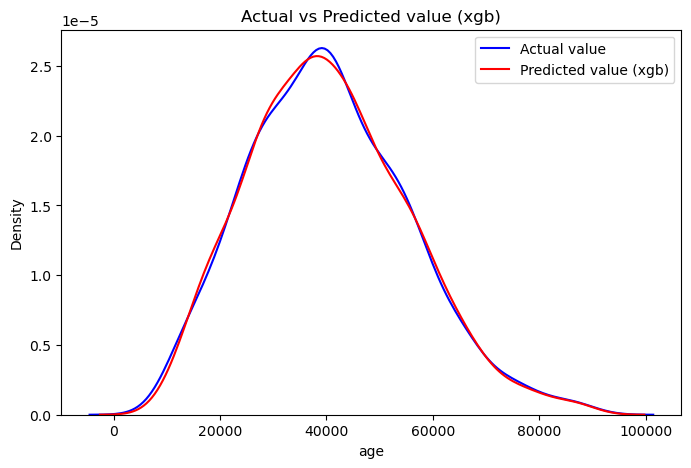

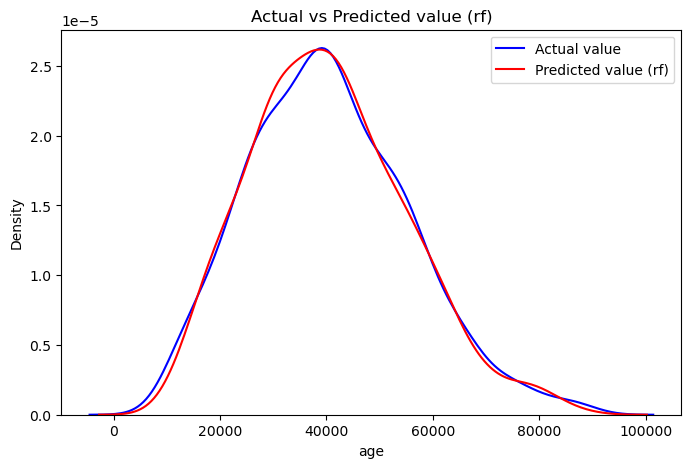

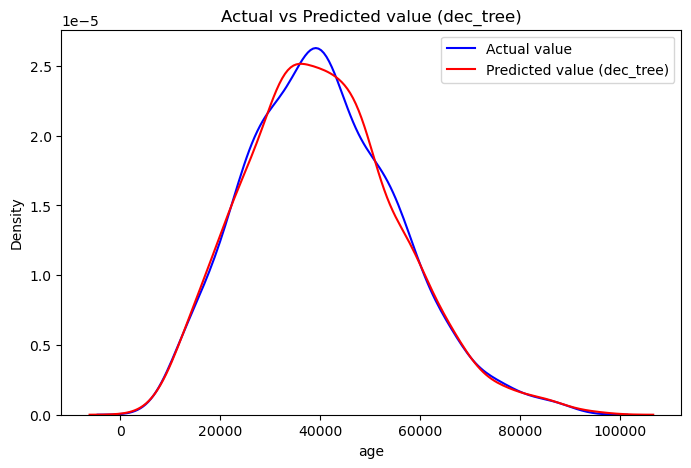

In [33]:
predictions = {
    'xgb': y_pred_xgb,
    'rf': y_pred_rf,
    'dec_tree': y_pred_dec_tree
}


for model_name, y_pred in predictions.items():
    plt.figure(figsize=(8, 5))
    
    sns.kdeplot(y_test, label='Actual value', color='blue')
    sns.kdeplot(y_pred, label=f'Predicted value ({model_name})', color='red')

    plt.title(f"Actual vs Predicted value ({model_name})")
    plt.legend()
    plt.show()

Overall performance: XGBoost Regressor

### 1.2 Engineering Graduate Salary Dataset

In [34]:
df_eng = pd.read_csv('dataset/1. regression/Engineering_graduate_salary.csv')
df_eng.head(10)

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
5,609356,f,1989-12-02,83.16,icse,2007,77.00,cbse,10950,1,...,-1,-1,313,-1,0.8463,-0.6201,-0.7585,-0.99500,-0.2859,440000
6,1081649,f,1989-04-17,72.50,state board,2007,53.20,state board,14381,2,...,469,-1,-1,-1,0.1282,-0.4536,0.3174,0.90660,-0.0943,150000
7,610842,f,1991-04-11,77.00,state board,2009,88.00,state board,13208,2,...,-1,-1,-1,-1,0.1282,0.5454,0.4711,0.90660,-0.2859,105000
8,1183070,m,1992-11-25,76.80,state board,2010,87.70,state board,5338,2,...,-1,-1,-1,-1,-0.1590,-0.4536,0.1637,0.52620,-0.0943,195000
9,794062,f,1993-03-15,57.00,state board,2009,73.00,state board,8346,2,...,-1,-1,-1,-1,-0.7335,-0.4536,-0.2974,1.41360,0.6721,200000


In [35]:
# Replacing -1 with NaN values
df_eng.replace(-1, np.nan, inplace=True)

In [36]:
check_data(df_eng)

--------------------------------------------------
There are 16643 missing values in the dataset.
There are 0 duplicated values in the dataset.
--------------------------------------------------
Missing values:
CivilEngg                2972
ElectricalEngg           2876
MechanicalEngg           2811
TelecomEngg              2724
ComputerScience          2298
ElectronicsAndSemicon    2133
ComputerProgramming       650
Domain                    179
Quant                       0
ID                          0
Gender                      0
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
Logical                     0
English                     0
GraduationYear              0
CollegeState                0
CollegeCityTier             0
CollegeCityID               0
collegeGPA                  0
Specialization              0
Degree                      0
CollegeTier                 0
CollegeID

In [37]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [38]:
# extract DOB year
df_eng['DOB'] = pd.to_datetime(df_eng['DOB'])
df_eng['birth_year'] = df_eng['DOB'].dt.year

In [39]:
df_eng.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary', 'birth_year'],
      dtype='object')

In [40]:
# Dropping unnecessary columns
cols = ['ID', 'CollegeID', 'CollegeCityID']

df_eng.drop(cols, axis=1, inplace=True)

In [41]:
df_eng.head()

,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,birth_year
0,f,1990-10-22,87.80,cbse,2009,84.00,cbse,1,B.Tech/B.E.,instrumentation and control engineering,...,NaN,NaN,NaN,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,1990
1,m,1990-05-15,57.00,cbse,2010,64.50,cbse,2,B.Tech/B.E.,computer science & engineering,...,NaN,NaN,NaN,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,1990
2,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,2,B.Tech/B.E.,electronics & telecommunications,...,NaN,260.0,NaN,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,1989
3,m,1991-05-04,84.30,cbse,2009,86.00,cbse,1,B.Tech/B.E.,computer science & engineering,...,NaN,NaN,NaN,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,1991
4,f,1990-10-30,82.00,cbse,2008,75.00,cbse,2,B.Tech/B.E.,biotechnology,...,NaN,NaN,NaN,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,1990


Split data into train and test set

In [42]:
X = df_eng.drop('Salary', axis=1)
y = df_eng['Salary']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=0
)

X_train.shape, X_test.shape

((2248, 31), (750, 31))

In [44]:
# capture categorical values
cat_cols = [var for var in X_train.columns if X_train[var].dtype == 'object']
cat_cols

['Gender', '10board', '12board', 'Degree', 'Specialization', 'CollegeState']

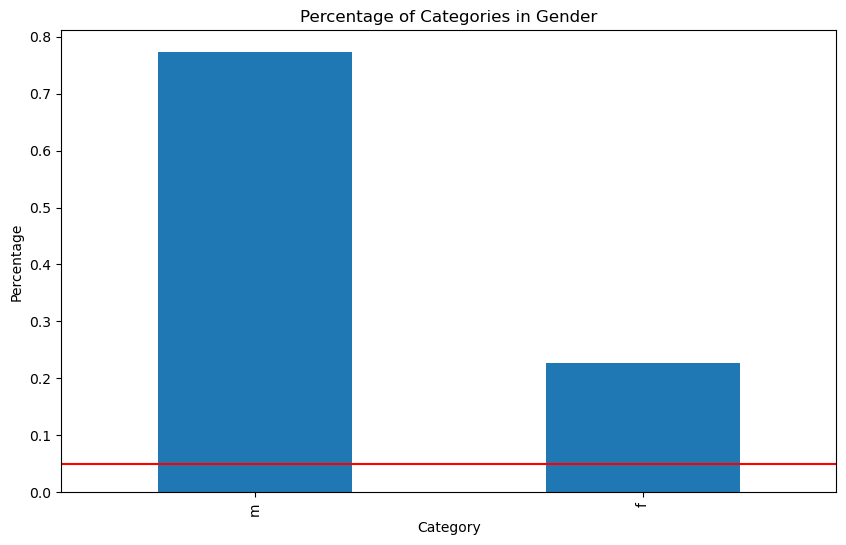

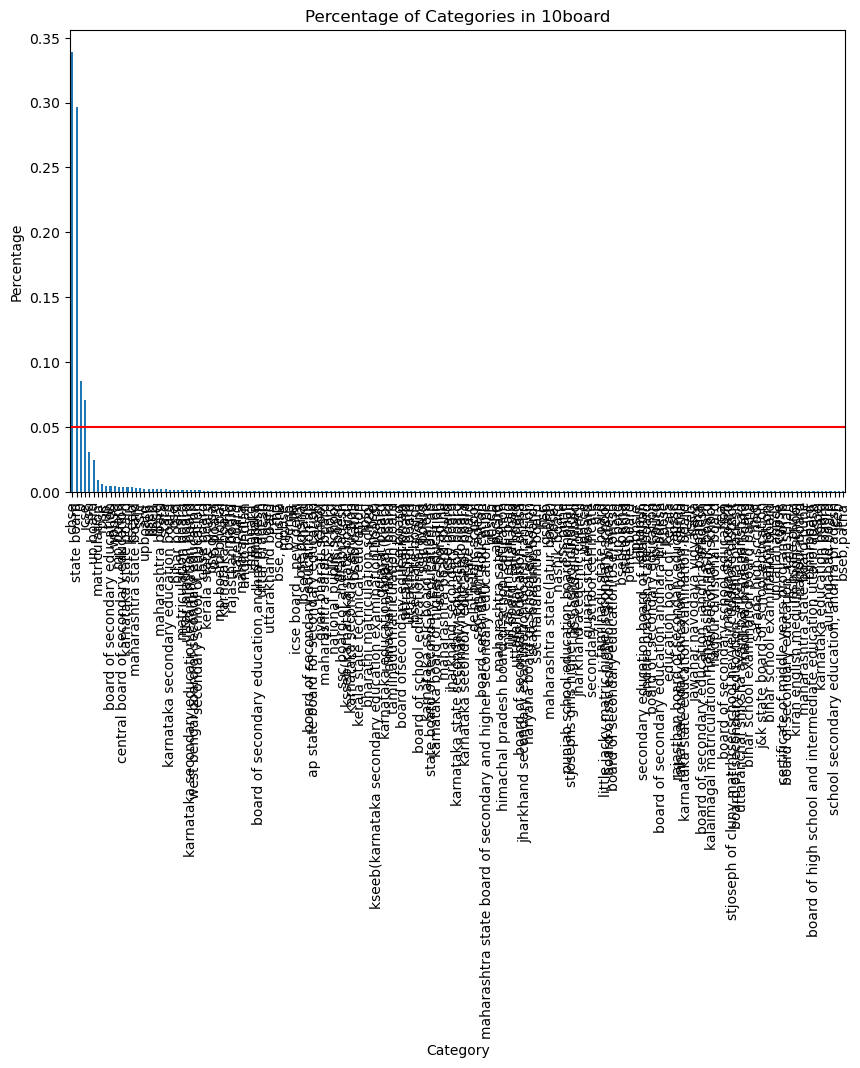

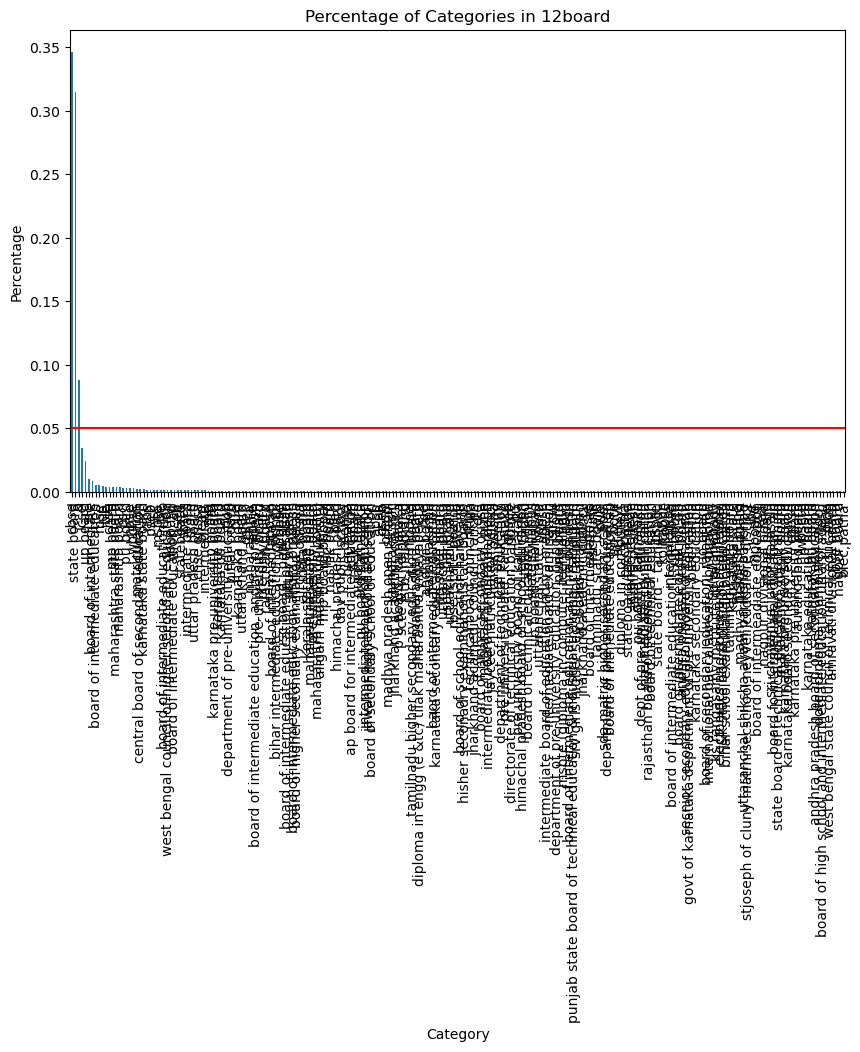

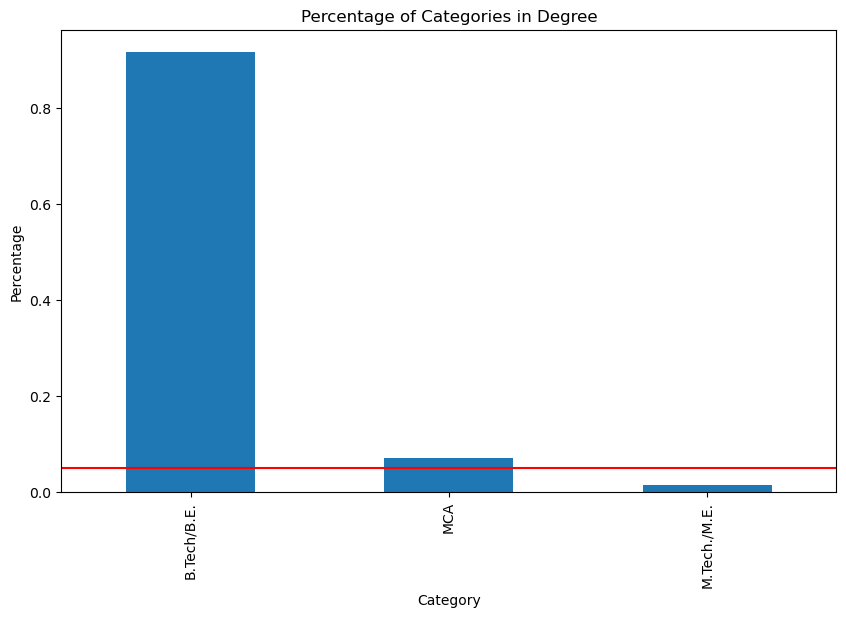

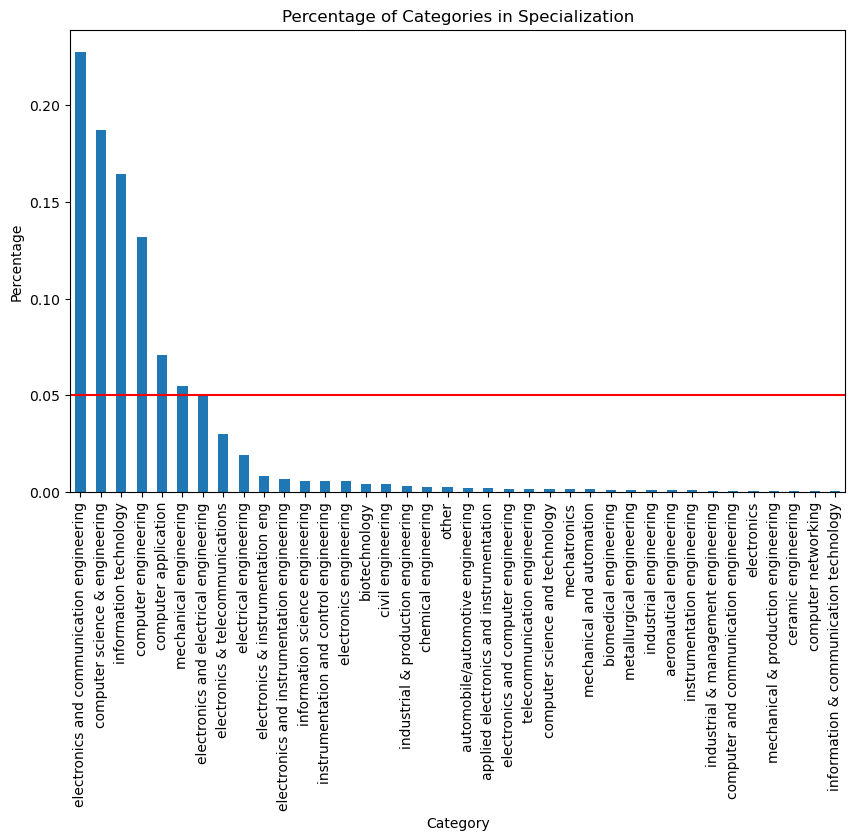

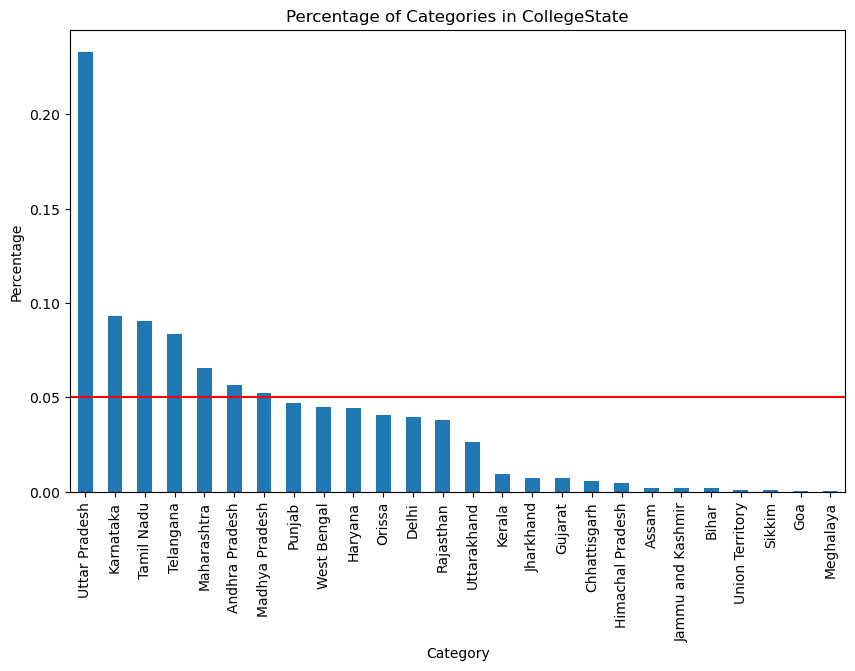

In [45]:
for col in cat_cols:
    value_counts = X_train[col].value_counts(normalize=True)  # Normalize to get percentages

    if not value_counts.empty:
        plt.figure(figsize=(10, 6))
        value_counts.plot(kind='bar')
        plt.title(f'Percentage of Categories in {col}')
        plt.axhline(0.05, color='red')
        plt.xlabel('Category')
        plt.ylabel('Percentage')
        plt.show()

Remove columns with too high cardinality of labels

In [46]:
X_train.drop(['12board', '10board', 'DOB'], axis=1, inplace=True)
X_test.drop(['12board', '10board', 'DOB'], axis=1, inplace=True)


# capture categorical values again
cat_cols = [var for var in X_train.columns if X_train[var].dtype == 'object']
cat_cols

['Gender', 'Degree', 'Specialization', 'CollegeState']

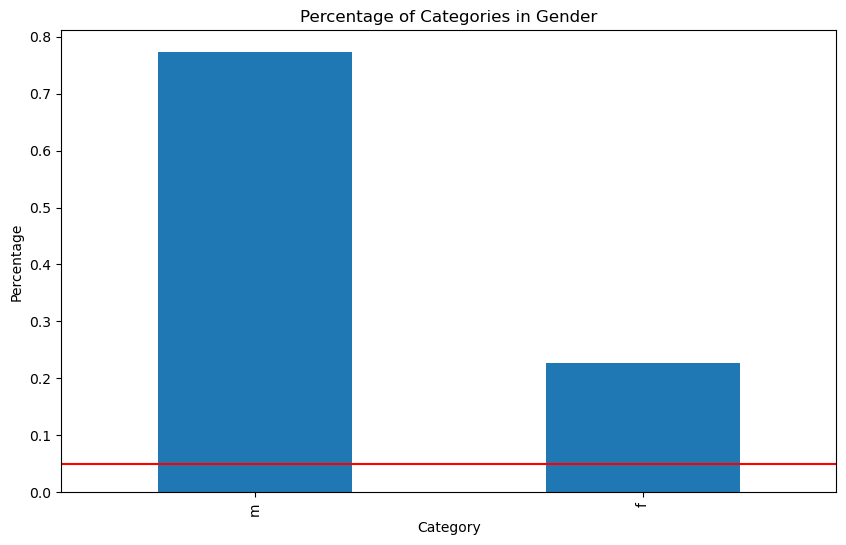

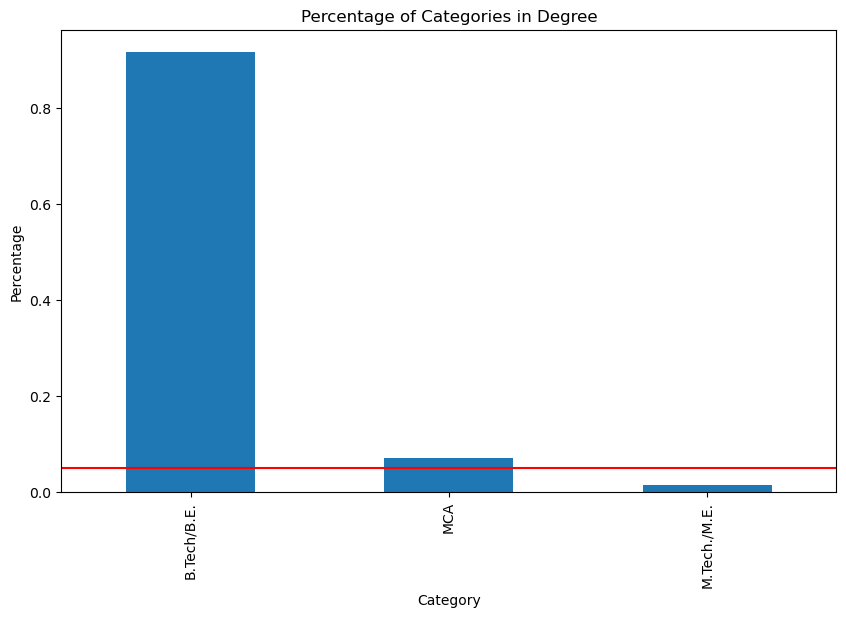

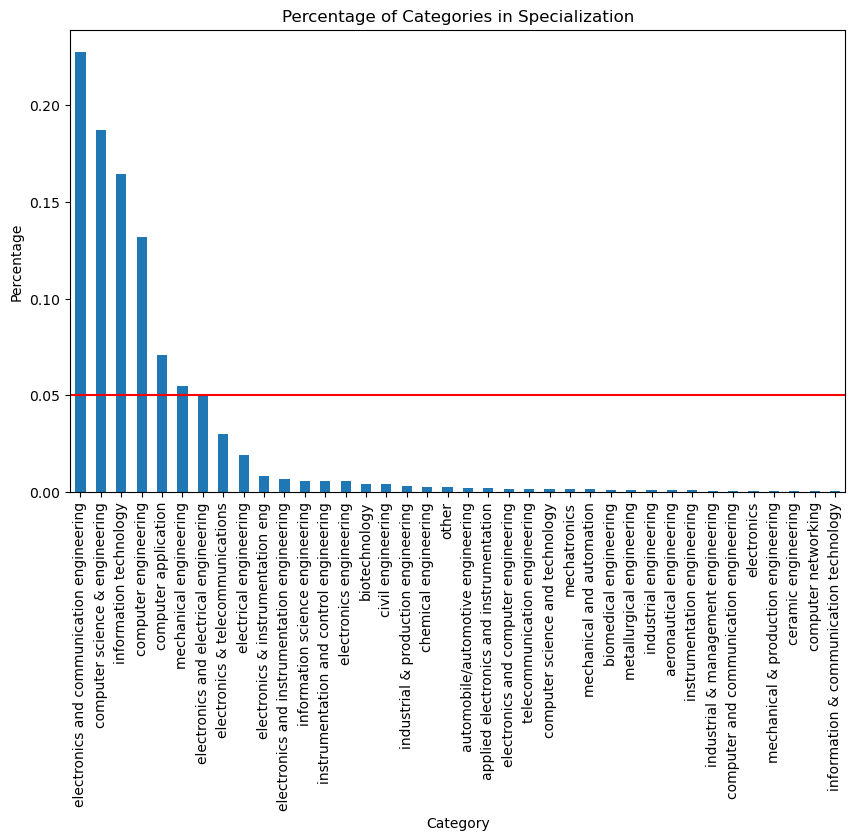

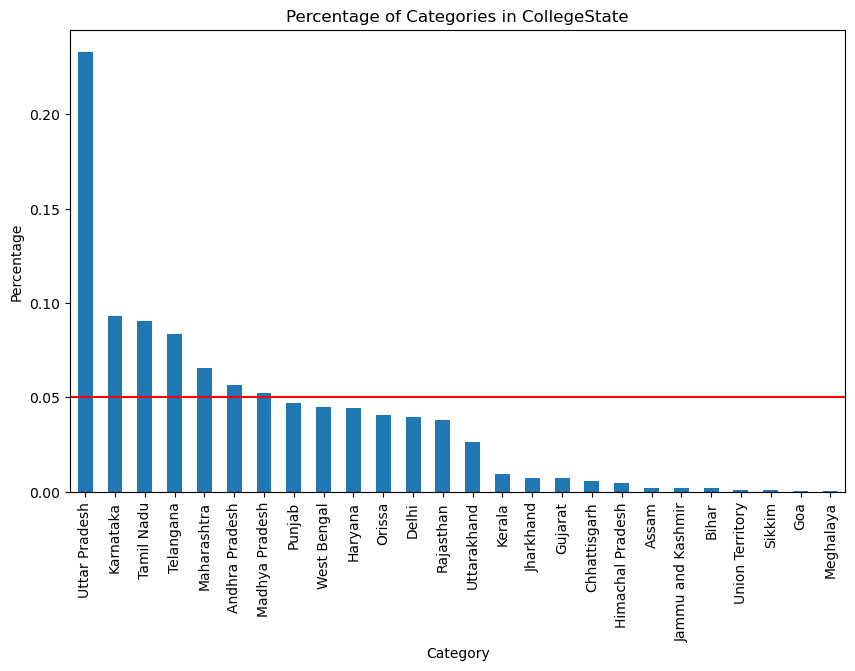

In [47]:
for col in cat_cols:
    value_counts = X_train[col].value_counts(normalize=True)  # Normalize to get percentages

    if not value_counts.empty:
        plt.figure(figsize=(10, 6))
        value_counts.plot(kind='bar')
        plt.title(f'Percentage of Categories in {col}')
        plt.axhline(0.05, color='red')
        plt.xlabel('Category')
        plt.ylabel('Percentage')
        plt.show()

Apply Rare Label Encoding

In [48]:
rare_encoder = RareLabelEncoder(
    tol = 0.05,
    n_categories = 2,
    variables = cat_cols
)

X_train = rare_encoder.fit_transform(X_train)
X_test = rare_encoder.transform(X_test)

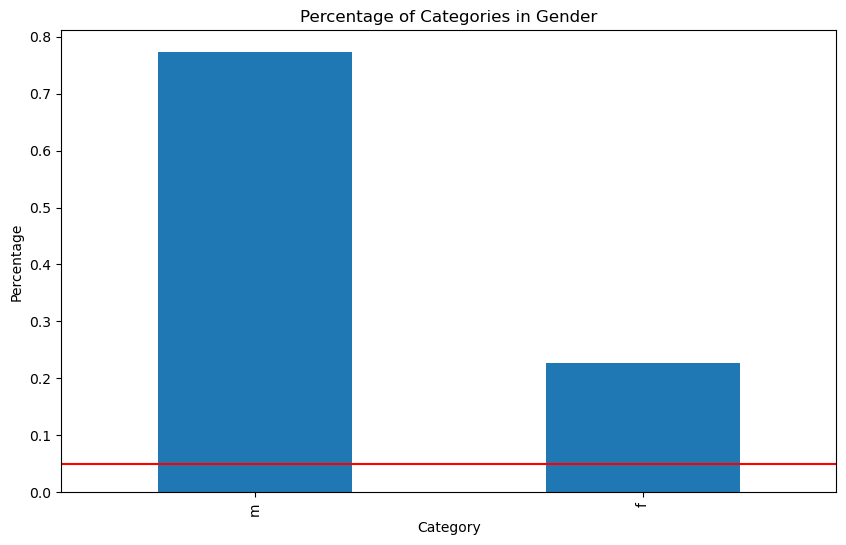

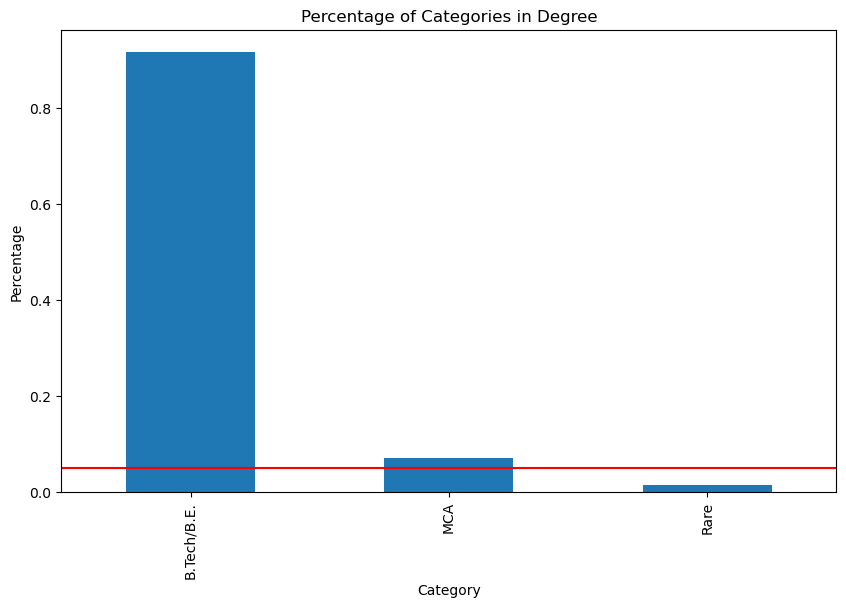

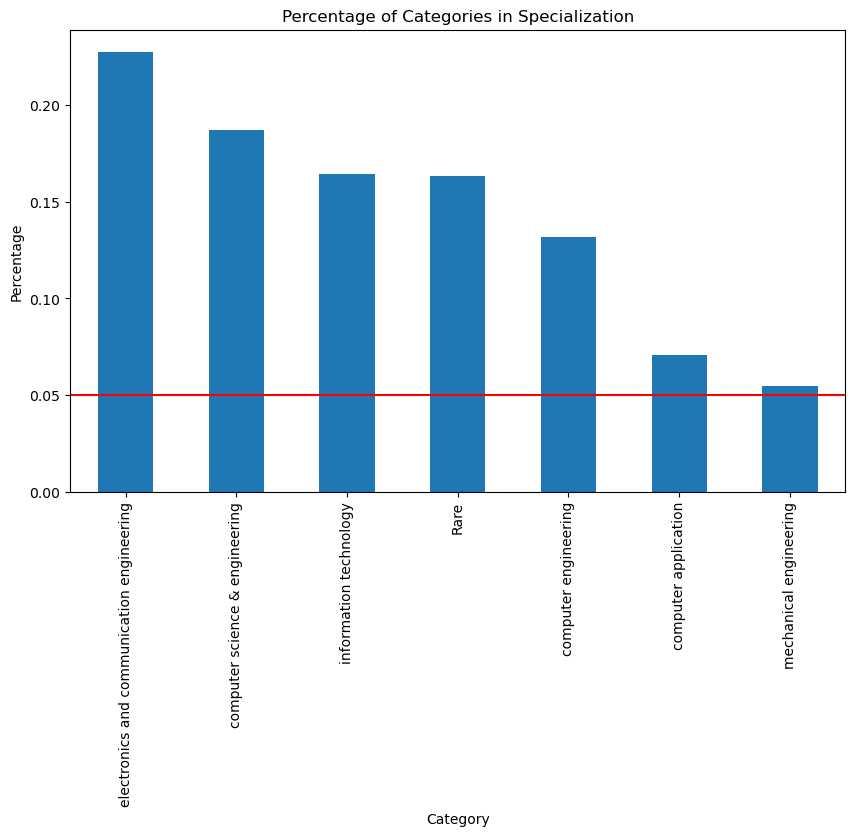

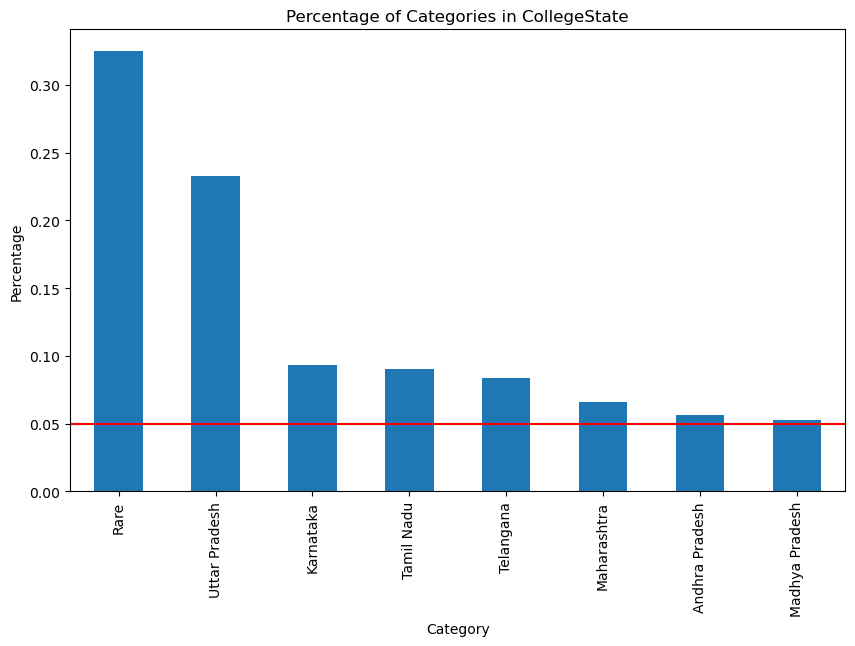

In [49]:
for col in cat_cols:
    value_counts = X_train[col].value_counts(normalize=True)  # Normalize to get percentages

    if not value_counts.empty:
        plt.figure(figsize=(10, 6))
        value_counts.plot(kind='bar')
        plt.title(f'Percentage of Categories in {col}')
        plt.axhline(0.05, color='red')
        plt.xlabel('Category')
        plt.ylabel('Percentage')
        plt.show()

In [50]:
num_cols = [var for var in X_train.columns if X_train[var].dtype != 'object']
X_train[num_cols].head(2)

,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,birth_year
487,84.4,2008,75.60,2,79.0,1,2013,535,610,735,...,NaN,NaN,NaN,NaN,1.2772,0.3789,-0.1437,0.2727,-0.0943,1990
2820,55.5,2007,59.38,2,64.4,0,2011,485,495,575,...,NaN,NaN,NaN,NaN,-0.4173,1.1248,-1.2148,-0.0552,0.3444,1989


In [51]:
missing_cols = [var for var in X_train.columns if X_train[var].isnull().any()]
missing_cols

['Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg']

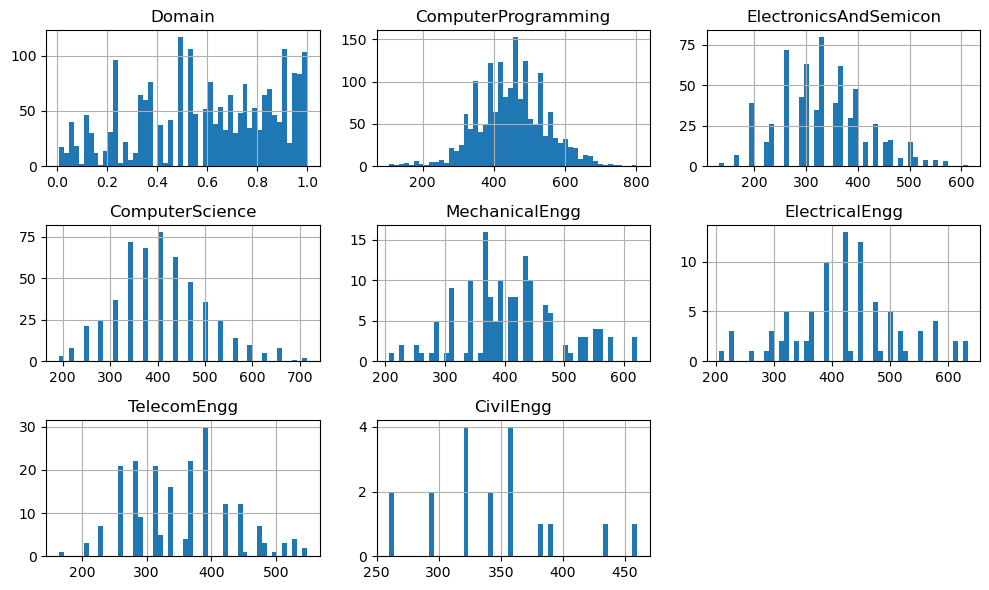

In [52]:
X_train[missing_cols].hist(bins=50, figsize=(10,6))
plt.tight_layout()
plt.show()

Use Mean Imputation for missing values:

In [53]:
imputer = MeanMedianImputer(
    imputation_method='mean',
    variables=missing_cols
)

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

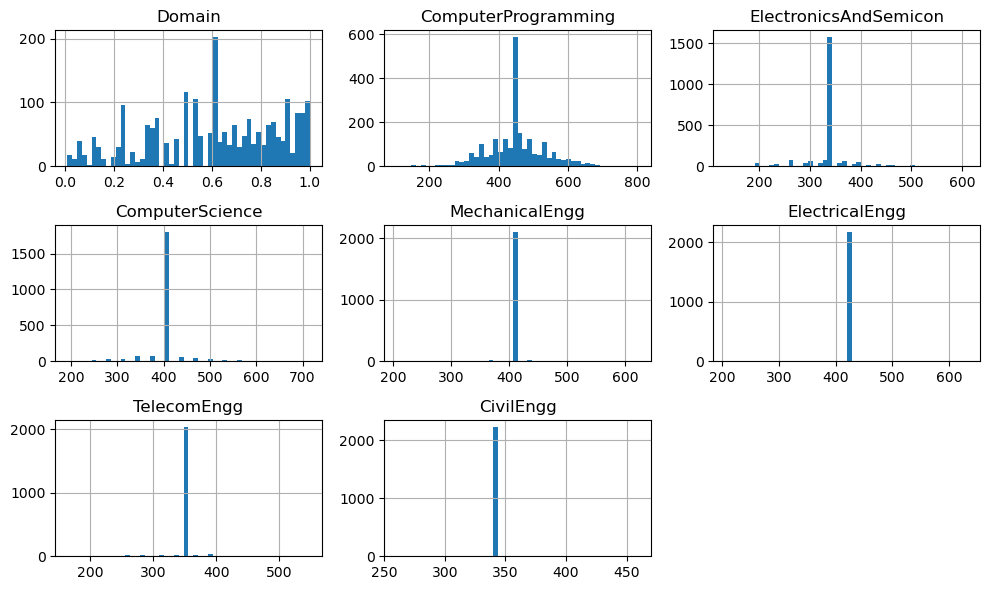

In [54]:
X_train[missing_cols].hist(bins=50, figsize=(10,6))
plt.tight_layout()
plt.show()

Scaling Numerical Features

In [55]:
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

Apply Label Encoding for categorical features

In [56]:
label_encoder = LabelEncoder()

for col in cat_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

X_train.head()

,Gender,10percentage,12graduation,12percentage,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,birth_year
487,1,0.670541,-0.050768,0.101841,0.284199,0,4,0.912842,1.571348,4,...,-2.627892e-15,-6.088855e-15,0.0,1.245081e-14,1.278117,0.258321,-0.148866,0.422642,0.039273,-0.244387
2820,1,-2.226646,-0.661068,-1.359266,0.284199,0,2,-0.872028,-0.636396,4,...,-2.627892e-15,-6.088855e-15,0.0,1.245081e-14,-0.361565,1.044035,-1.257130,0.099114,0.481604,-0.817258
1093,0,1.272033,-0.661068,1.128759,0.284199,0,2,0.668340,-0.636396,4,...,-2.627892e-15,-6.088855e-15,0.0,1.245081e-14,0.311435,0.222401,0.094392,-0.973393,-0.474143,-0.244387
438,1,1.131685,-1.271368,1.768331,0.284199,0,4,-0.673981,-0.636396,6,...,-2.627892e-15,-6.088855e-15,0.0,1.245081e-14,-0.062464,-0.435011,-0.656488,-0.364718,0.561258,-0.817258
748,1,-1.274284,-1.881669,-0.762933,0.284199,0,5,-1.381817,1.571348,1,...,-2.627892e-15,-6.088855e-15,0.0,1.245081e-14,-0.810264,-0.270579,1.896525,1.142612,0.481604,-0.817258


In [57]:
check_data(X_train)

--------------------------------------------------
There are 0 missing values in the dataset.
There are 0 duplicated values in the dataset.
--------------------------------------------------


In [58]:
check_data(X_test)

--------------------------------------------------
There are 0 missing values in the dataset.
There are 0 duplicated values in the dataset.
--------------------------------------------------


Training our Model

In [59]:
models ={
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=0),
    'Decision Tree': DecisionTreeRegressor(random_state=0),
    'XGBoost':  xgb.XGBRegressor(random_state=0)
}

Compare without target variable transformation

In [60]:
# Training set
result_train = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    
    mse = mean_squared_error(y_train, y_pred)
    mae = mean_absolute_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    rmse = np.sqrt(mse)
    
    result_train[name] = {
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'R^2 Score': r2,
        'Root Mean Squared Error': rmse
    }

In [61]:
# testing set
result_test = {}

for name, model in models.items():
    model.fit(X_test, y_test)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    result_test[name] = {
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'R^2 Score': r2,
        'Root Mean Squared Error': rmse
    }

In [62]:
comparison_df_train = pd.DataFrame(result_train).T
comparison_df_train.reset_index(inplace=True)
comparison_df_train.rename(columns={'index': 'Model'}, inplace=True)

comparison_df_test = pd.DataFrame(result_test).T
comparison_df_test.reset_index(inplace=True)
comparison_df_test.rename(columns={'index': 'Model'}, inplace=True)

In [63]:
comparison_df_train

,Model,Mean Squared Error,Mean Absolute Error,R^2 Score,Root Mean Squared Error
0,Linear Regression,4.005076e+10,103188.461524,0.166774,200126.865248
1,Random Forest Regressor,6.229483e+09,40749.323843,0.870400,78927.070776
2,Decision Tree,0.000000e+00,0.000000,1.000000,0.000000
3,XGBoost,7.919025e+08,19407.241812,0.983525,28140.761610


In [64]:
comparison_df_test

,Model,Mean Squared Error,Mean Absolute Error,R^2 Score,Root Mean Squared Error
0,Linear Regression,2.839110e+10,103770.595403,0.211885,168496.586238
1,Random Forest Regressor,4.071987e+09,41619.133333,0.886965,63812.121550
2,Decision Tree,0.000000e+00,0.000000,1.000000,0.000000
3,XGBoost,8.037908e+06,1809.413380,0.999777,2835.120487


Applying square root transformation to target variable

In [65]:
y_train_sqrt = np.sqrt(y_train)
y_test_sqrt = np.sqrt(y_test)

In [66]:
# Training set
result_train = {}

for name, model in models.items():
    model.fit(X_train, y_train_sqrt)
    y_pred = model.predict(X_train)
    
    mse = mean_squared_error(y_train_sqrt, y_pred)
    mae = mean_absolute_error(y_train_sqrt, y_pred)
    r2 = r2_score(y_train_sqrt, y_pred)
    rmse = np.sqrt(mse)
    
    result_train[name] = {
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'R^2 Score': r2,
        'Root Mean Squared Error': rmse
    }

In [67]:
# testing set
result_test = {}

for name, model in models.items():
    model.fit(X_test, y_test_sqrt)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test_sqrt, y_pred)
    mae = mean_absolute_error(y_test_sqrt, y_pred)
    r2 = r2_score(y_test_sqrt, y_pred)
    rmse = np.sqrt(mse)
    
    result_test[name] = {
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'R^2 Score': r2,
        'Root Mean Squared Error': rmse
    }

In [68]:
comparison_df_train = pd.DataFrame(result_train).T
comparison_df_train.reset_index(inplace=True)
comparison_df_train.rename(columns={'index': 'Model'}, inplace=True)

comparison_df_test = pd.DataFrame(result_test).T
comparison_df_test.reset_index(inplace=True)
comparison_df_test.rename(columns={'index': 'Model'}, inplace=True)

In [69]:
comparison_df_train

,Model,Mean Squared Error,Mean Absolute Error,R^2 Score,Root Mean Squared Error
0,Linear Regression,1.689149e+04,8.924284e+01,0.253227,1.299673e+02
1,Random Forest Regressor,2.575184e+03,3.461149e+01,0.886151,5.074628e+01
2,Decision Tree,1.724826e-29,3.034346e-16,1.000000,4.153103e-15
3,XGBoost,5.433911e+02,1.650808e+01,0.975977,2.331075e+01


In [70]:
comparison_df_test

,Model,Mean Squared Error,Mean Absolute Error,R^2 Score,Root Mean Squared Error
0,Linear Regression,1.657604e+04,9.443033e+01,0.251510,1.287480e+02
1,Random Forest Regressor,2.512241e+03,3.689991e+01,0.886560,5.012226e+01
2,Decision Tree,1.292470e-29,2.273737e-16,1.000000,3.595093e-15
3,XGBoost,6.460720e+00,1.640142e+00,0.999708,2.541795e+00


In [71]:
model_xgb =  xgb.XGBRegressor(random_state=0)
model_rf = RandomForestRegressor(random_state=0)
model_dec_tree = DecisionTreeRegressor(random_state=0)

model_xgb.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_dec_tree.fit(X_train, y_train)



y_pred_xgb = model_xgb.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_dec_tree = model_dec_tree.predict(X_test)

In [72]:

# Initialize your model
model = xgb.XGBRegressor(random_state=0)

# Perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

print("Cross-validated R^2 scores:", scores)
print("Mean cross-validated R^2 score:", scores.mean())


Cross-validated R^2 scores: [ 0.0792147  -0.03908438 -0.11210692  0.10693475 -0.26816544]
Mean cross-validated R^2 score: -0.04664145577461716


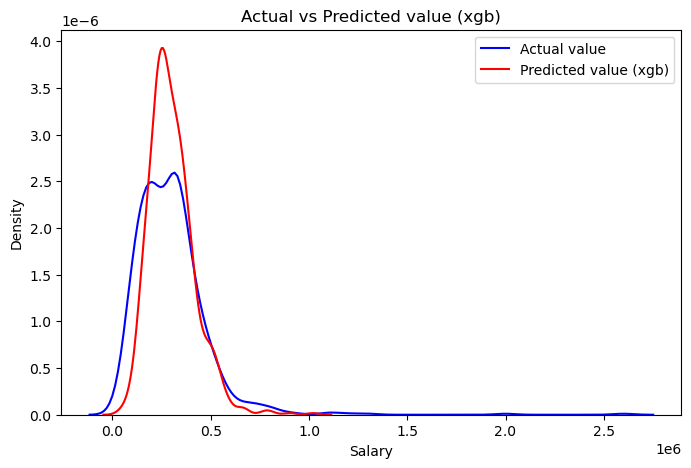

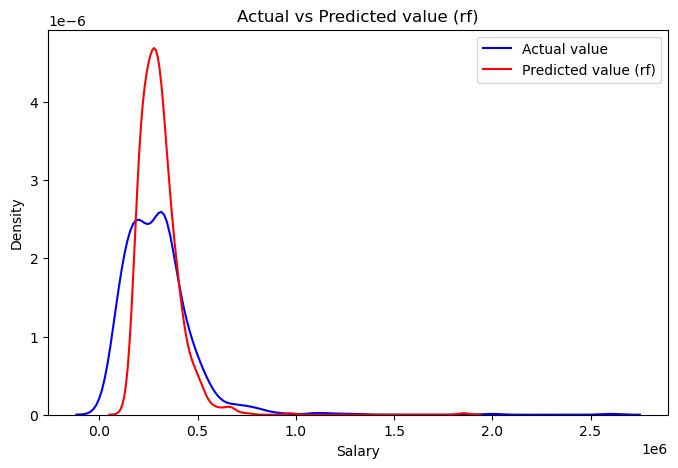

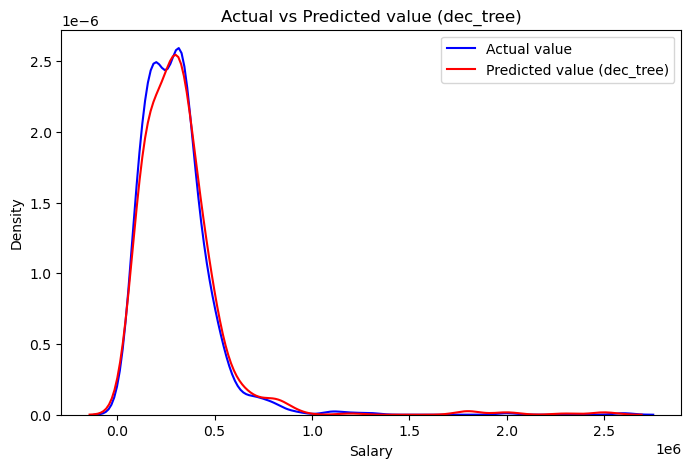

In [73]:
predictions = {
    'xgb': y_pred_xgb,
    'rf': y_pred_rf,
    'dec_tree': y_pred_dec_tree
}


for model_name, y_pred in predictions.items():
    plt.figure(figsize=(8, 5))
    
    sns.kdeplot(y_test, label='Actual value', color='blue')
    sns.kdeplot(y_pred, label=f'Predicted value ({model_name})', color='red')

    plt.title(f"Actual vs Predicted value ({model_name})")
    plt.legend()
    plt.show()

## 2. Classification

### 2.2 Heart Failure Dataset

In [74]:
df_heart = pd.read_csv('dataset/2. classification/heart_failure.csv')
df_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [75]:
check_data(df_heart)

--------------------------------------------------
There are 0 missing values in the dataset.
There are 0 duplicated values in the dataset.
--------------------------------------------------


In [76]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [77]:
# replacing label for visualization purposes
df_heart['FastingBS'].replace({0: 'Otherwise', 1: '120 mg/dl'}, inplace=True)

Categorical columns proportions

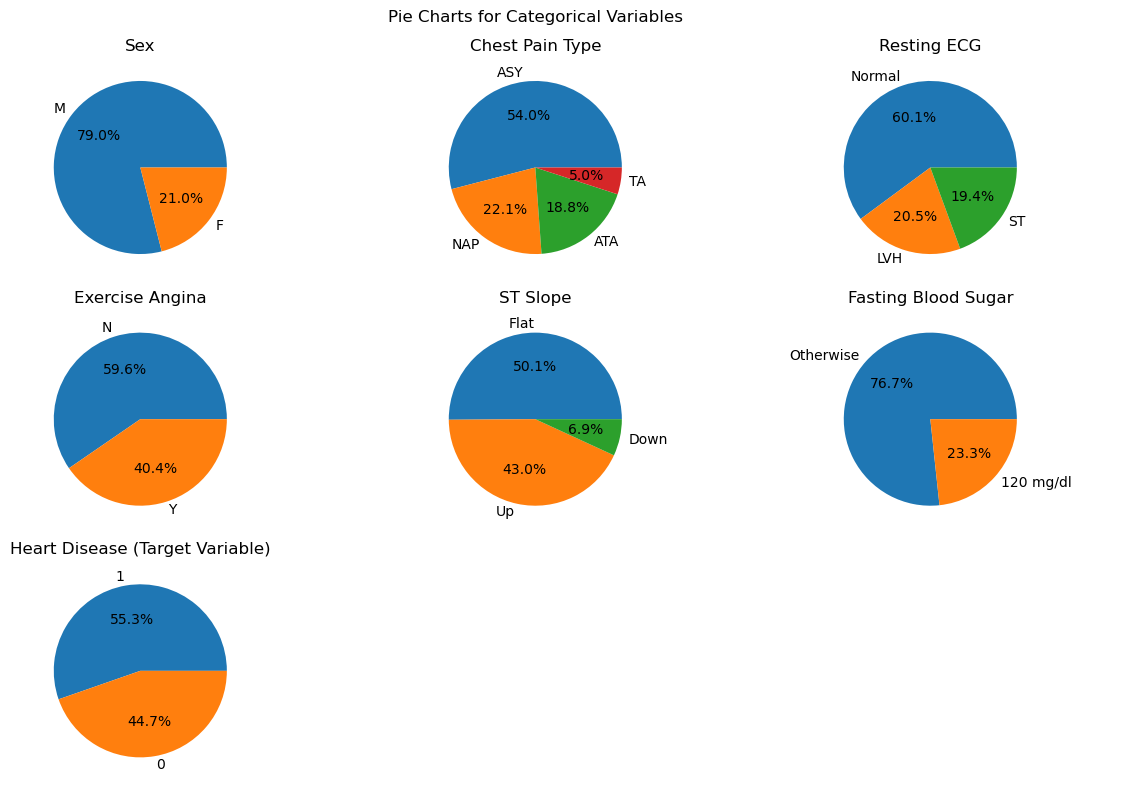

In [78]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))  # Create a grid of subplots
plt.style.use('default')

axes[0, 0].pie(df_heart['Sex'].value_counts(), labels=df_heart['Sex'].value_counts().index, autopct='%1.1f%%')
axes[0, 0].set_title('Sex')

axes[0, 1].pie(df_heart['ChestPainType'].value_counts(), labels=df_heart['ChestPainType'].value_counts().index, autopct='%1.1f%%')
axes[0, 1].set_title('Chest Pain Type')

axes[0, 2].pie(df_heart['RestingECG'].value_counts(), labels=df_heart['RestingECG'].value_counts().index, autopct='%1.1f%%')
axes[0, 2].set_title('Resting ECG')

axes[1, 0].pie(df_heart['ExerciseAngina'].value_counts(), labels=df_heart['ExerciseAngina'].value_counts().index, autopct='%1.1f%%')
axes[1, 0].set_title('Exercise Angina')

axes[1, 1].pie(df_heart['ST_Slope'].value_counts(), labels=df_heart['ST_Slope'].value_counts().index, autopct='%1.1f%%')
axes[1, 1].set_title('ST Slope')

axes[1, 2].pie(df_heart['FastingBS'].value_counts(), labels=df_heart['FastingBS'].value_counts().index, autopct='%1.1f%%')
axes[1, 2].set_title('Fasting Blood Sugar')

axes[2, 0].pie(df_heart['HeartDisease'].value_counts(), labels=df_heart['HeartDisease'].value_counts().index, autopct='%1.1f%%')
axes[2, 0].set_title('Heart Disease (Target Variable)')

# Hide the unused subplot
axes[2, 1].axis('off') 
axes[2, 2].axis('off')

fig.suptitle('Pie Charts for Categorical Variables')
plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [79]:
X = df_heart.drop('HeartDisease', axis=1)
y = df_heart['HeartDisease']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((734, 11), (184, 11), (734,), (184,))

In [81]:
num_cols = [var for var in X_train.columns if X_train[var].dtype != 'object']
cat_cols = [var for var in X_train.columns if X_train[var].dtype == 'object']

print(f'Numerical columns: {num_cols}')
print(f'Categorical columns: {cat_cols}')

Numerical columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
Categorical columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


Visualizing the distribution of numerical columns

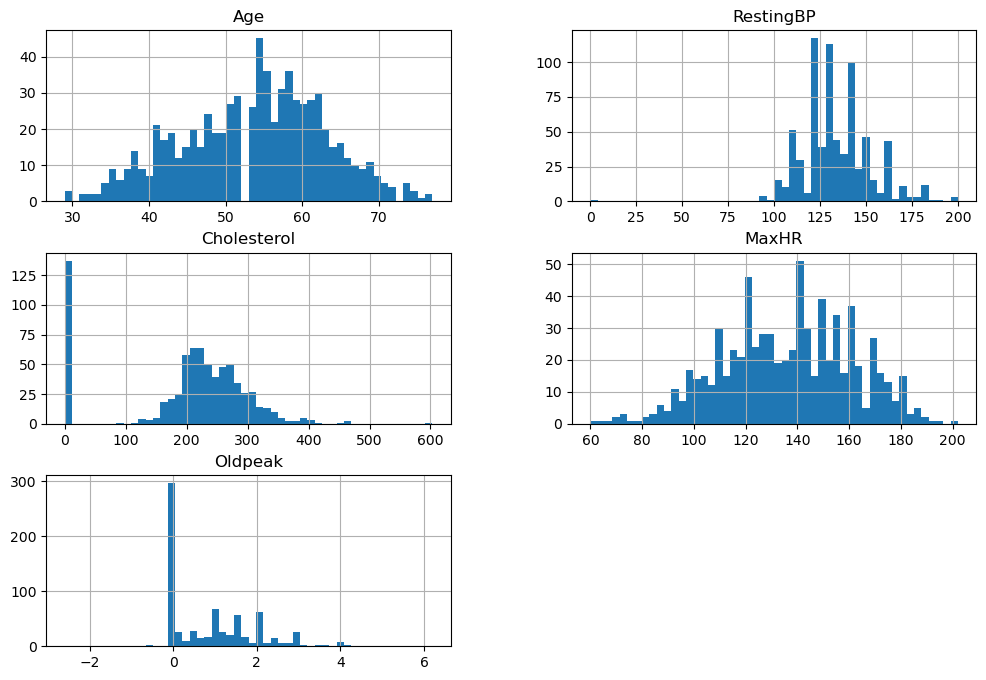

In [82]:
X_train[num_cols].hist(bins=50, figsize=(12, 8))
plt.show()

Skewed distribution:
- Resting BP
- Oldpeak
- Cholesterol

Normal distribution:
- MaxHR
- Age

Feature Scaling

In [83]:
min_max_sc = MinMaxScaler()
std_sc = StandardScaler()


min_max = ['MaxHR', 'Age']
std = ['Cholesterol', 'Oldpeak', 'RestingBP']

for col in min_max:
    X_train_col = X_train[[col]]  # Reshape to 2D array
    X_test_col = X_test[[col]]    # Reshape to 2D array
    
    X_train[[col]] = min_max_sc.fit_transform(X_train_col)
    X_test[[col]] = min_max_sc.transform(X_test_col)

for col in std:
    X_train_col = X_train[[col]]  # Reshape to 2D array
    X_test_col = X_test[[col]]    # Reshape to 2D array
    
    X_train[[col]] = std_sc.fit_transform(X_train_col)
    X_test[[col]] = std_sc.transform(X_test_col)

In [84]:
X_train.sample(2, random_state=0)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
411,0.520833,M,ASY,2.547216,-1.846478,120 mg/dl,Normal,0.633803,N,0.549761,Flat
248,0.333333,M,ASY,-0.166285,0.178616,Otherwise,ST,0.492958,Y,0.087745,Flat


Variable Encoding:

In [85]:
arbitrary_enc = OrdinalEncoder(
    encoding_method ='arbitrary',
    variables = cat_cols
)

X_train = arbitrary_enc.fit_transform(X_train)
X_test = arbitrary_enc.transform(X_test)

In [86]:
X_train.sample(2, random_state=0)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
411,0.520833,0,1,2.547216,-1.846478,0,0,0.633803,0,0.549761,2
248,0.333333,0,1,-0.166285,0.178616,1,2,0.492958,1,0.087745,2


Feature Correlation

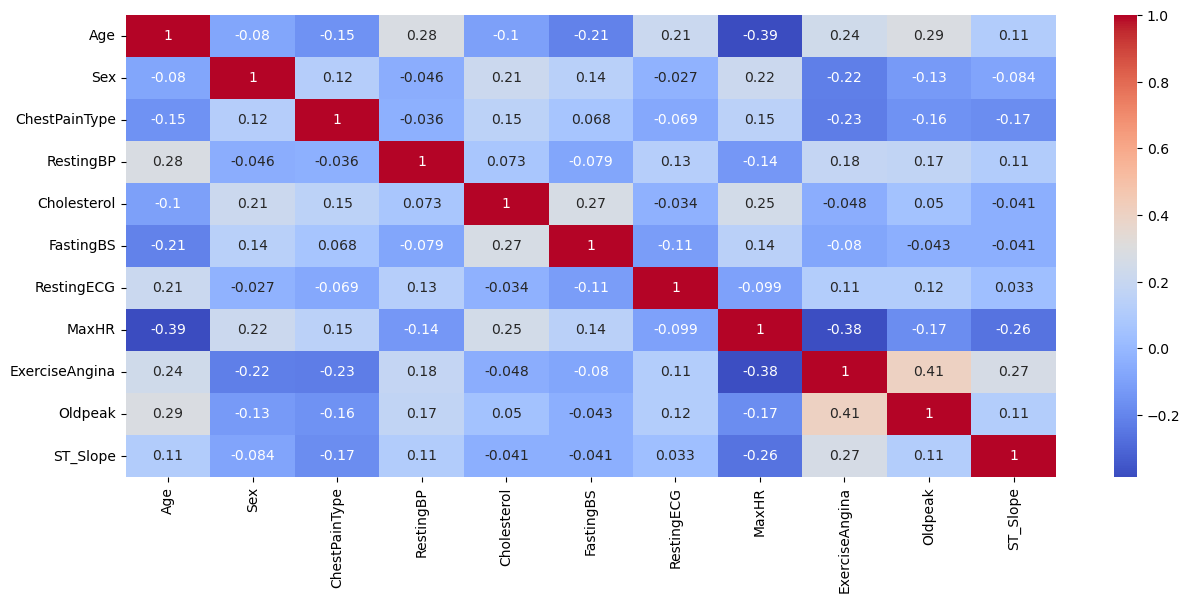

In [87]:
plt.figure(figsize=(15, 6))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.show()

In [88]:
# copying original df
df_heart_copy = df_heart.copy()

arbitrary_enc = OrdinalEncoder(
    encoding_method='arbitrary',
)
df_heart_copy = arbitrary_enc.fit_transform(df_heart_copy)

min_max_sc = MinMaxScaler()
std_sc = StandardScaler()


min_max = ['MaxHR', 'Age']
std = ['Cholesterol', 'Oldpeak', 'RestingBP']

for col in min_max:
    df_heart_copy_col = df_heart_copy[[col]]  # Reshape to 2D array
    df_heart_copy[[col]] = min_max_sc.fit_transform(df_heart_copy_col)

for col in std:
    df_heart_copy_col = df_heart_copy[[col]]  # Reshape to 2D array    
    df_heart_copy[[col]] = std_sc.fit_transform(df_heart_copy_col)

df_heart_copy.sample(2, random_state=0)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
306,0.55102,0,2,-0.940145,-1.818435,1,0,0.669014,0,-0.738623,1,1
711,0.77551,0,2,-0.669935,0.943982,0,2,0.640845,0,-0.457194,1,0


In [89]:
print(f'Length of categorical features: {len(cat_cols)}')
print(f'Length of numerical features: {len(num_cols)}')

Length of categorical features: 6
Length of numerical features: 5


Feature Selection method used: `Mutual Infomation`

In [90]:
X = df_heart_copy.drop(['HeartDisease'], axis=1)
y = df_heart_copy['HeartDisease']

mi_selector = SelectKBest(mutual_info_classif, k='all')
X_new = mi_selector.fit_transform(X, y)

# extract Mutual Information scores
features_scores = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi_selector.scores_
})

features_scores = features_scores.sort_values(by='Mutual Information', ascending=False)
features_scores

,Feature,Mutual Information
10,ST_Slope,0.196979
2,ChestPainType,0.165023
8,ExerciseAngina,0.151697
9,Oldpeak,0.118175
7,MaxHR,0.099043
4,Cholesterol,0.074715
1,Sex,0.061226
5,FastingBS,0.039523
0,Age,0.035275
6,RestingECG,0.020638


We'll exclude `RestingBP` & `RestingECG` from our dataset

In [91]:
# dropping excluded columns
X_train.drop(['RestingBP', 'RestingECG'], axis=1, inplace=True)
X_test.drop(['RestingBP', 'RestingECG'], axis=1, inplace=True)

In [92]:
X_train.columns, X_test.columns

(Index(['Age', 'Sex', 'ChestPainType', 'Cholesterol', 'FastingBS', 'MaxHR',
        'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
       dtype='object'),
 Index(['Age', 'Sex', 'ChestPainType', 'Cholesterol', 'FastingBS', 'MaxHR',
        'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
       dtype='object'))

Training our models

In [93]:
def model_train(model):
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on both training and test data
    y_preds_train = model.predict(X_train)
    y_preds_test = model.predict(X_test)

    print('-'*50)
    print('Training set performance')
    print()
    print(f"Accuracy: {accuracy_score(y_train, y_preds_train)}")
    print(f"Precision: {precision_score(y_train, y_preds_train)}")
    print(f"Recall: {recall_score(y_train, y_preds_train)}")
    print(f"F1 Score: {f1_score(y_train, y_preds_train)}")
    print(f'ROC-AUC Score: {roc_auc_score(y_train, y_preds_train)}')
    print('-'*50)
    
    print('Test set performance')
    print()
    print(f"Accuracy: {accuracy_score(y_test, y_preds_test)}")
    print(f"Precision: {precision_score(y_test, y_preds_test)}")
    print(f"Recall: {recall_score(y_test, y_preds_test)}")
    print(f"F1 Score: {f1_score(y_test, y_preds_test)}")
    print(f'ROC-AUC Score: {roc_auc_score(y_test, y_preds_test)}')
    print('-'*50)

    # Plot the confusion matrix for test set only
    cm = confusion_matrix(y_test, y_preds_test)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix (Test Set): {model}')
    plt.show()


--------------------------------------------------
Training set performance

Accuracy: 0.8514986376021798
Precision: 0.8705583756345178
Recall: 0.8553615960099751
F1 Score: 0.8628930817610063
ROC-AUC Score: 0.8511042214284109
--------------------------------------------------
Test set performance

Accuracy: 0.8206521739130435
Precision: 0.8775510204081632
Recall: 0.8037383177570093
F1 Score: 0.8390243902439024
ROC-AUC Score: 0.8239470809564267
--------------------------------------------------


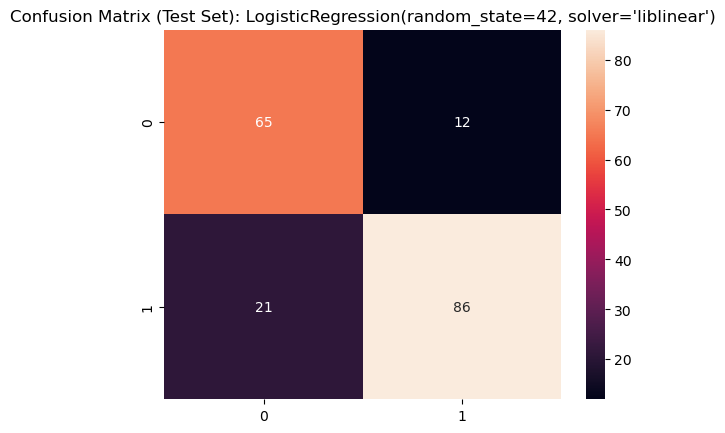

In [94]:
# logistic regression
model_lr = LogisticRegression(solver='liblinear',
                              random_state=42)

model_train(model_lr)

--------------------------------------------------
Training set performance

Accuracy: 0.8542234332425068
Precision: 0.8638613861386139
Recall: 0.8703241895261845
F1 Score: 0.867080745341615
ROC-AUC Score: 0.8525795121805098
--------------------------------------------------
Test set performance

Accuracy: 0.8043478260869565
Precision: 0.865979381443299
Recall: 0.7850467289719626
F1 Score: 0.8235294117647058
ROC-AUC Score: 0.808107780070397
--------------------------------------------------


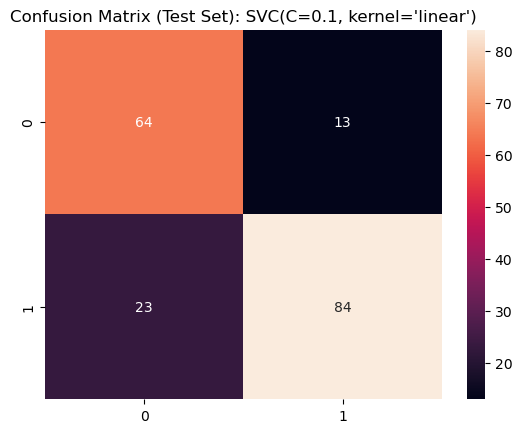

In [95]:
# support vector machine
model_svc = SVC(kernel='linear', C=0.1)
model_train(model_svc)

--------------------------------------------------
Training set performance

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC Score: 1.0
--------------------------------------------------
Test set performance

Accuracy: 0.8043478260869565
Precision: 0.865979381443299
Recall: 0.7850467289719626
F1 Score: 0.8235294117647058
ROC-AUC Score: 0.808107780070397
--------------------------------------------------


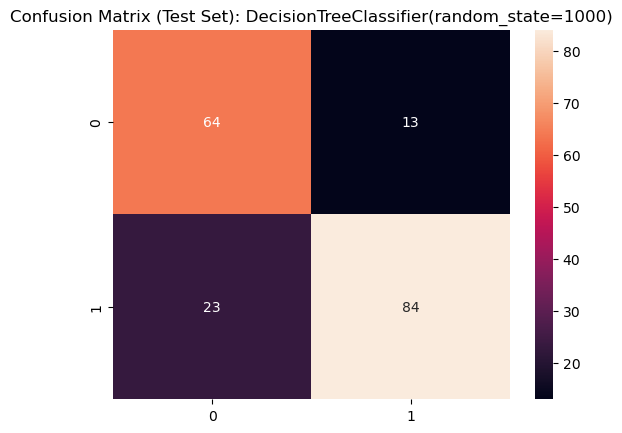

In [96]:
model_dt_no_params = DecisionTreeClassifier(random_state=1000)
model_train(model_dt_no_params)

--------------------------------------------------
Training set performance

Accuracy: 0.888283378746594
Precision: 0.8918918918918919
Recall: 0.9052369077306733
F1 Score: 0.8985148514851485
ROC-AUC Score: 0.8865523877992706
--------------------------------------------------
Test set performance

Accuracy: 0.8532608695652174
Precision: 0.8921568627450981
Recall: 0.8504672897196262
F1 Score: 0.8708133971291866
ROC-AUC Score: 0.8538050734312417
--------------------------------------------------


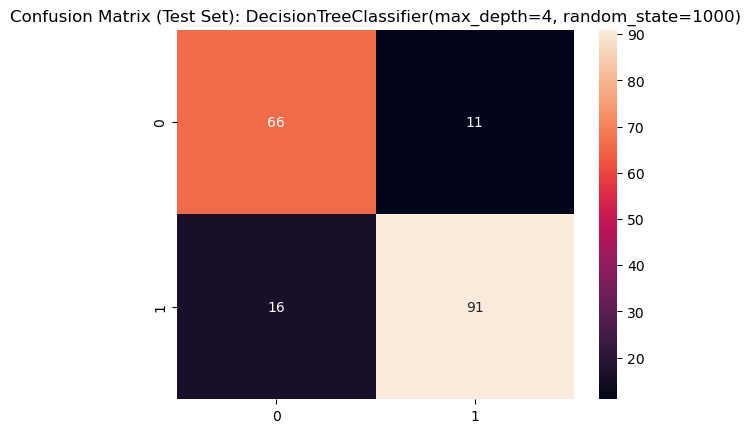

In [97]:
# decision tree
model_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
model_train(model_dt)

--------------------------------------------------
Training set performance

Accuracy: 0.8991825613079019
Precision: 0.8847058823529412
Recall: 0.9376558603491272
F1 Score: 0.910411622276029
ROC-AUC Score: 0.8952543566009901
--------------------------------------------------
Test set performance

Accuracy: 0.875
Precision: 0.8818181818181818
Recall: 0.9065420560747663
F1 Score: 0.8940092165898618
ROC-AUC Score: 0.8688554436217989
--------------------------------------------------


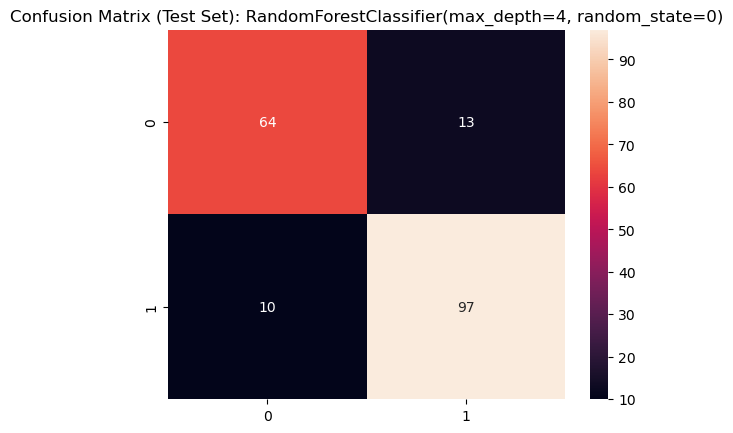

In [98]:
# random forest
model_rf = RandomForestClassifier(max_depth = 4,random_state = 0)
model_train(model_rf)

--------------------------------------------------
Training set performance

Accuracy: 0.9277929155313351
Precision: 0.9202898550724637
Recall: 0.9501246882793017
F1 Score: 0.9349693251533743
ROC-AUC Score: 0.9255127945901013
--------------------------------------------------
Test set performance

Accuracy: 0.875
Precision: 0.9117647058823529
Recall: 0.8691588785046729
F1 Score: 0.8899521531100478
ROC-AUC Score: 0.876137880810778
--------------------------------------------------


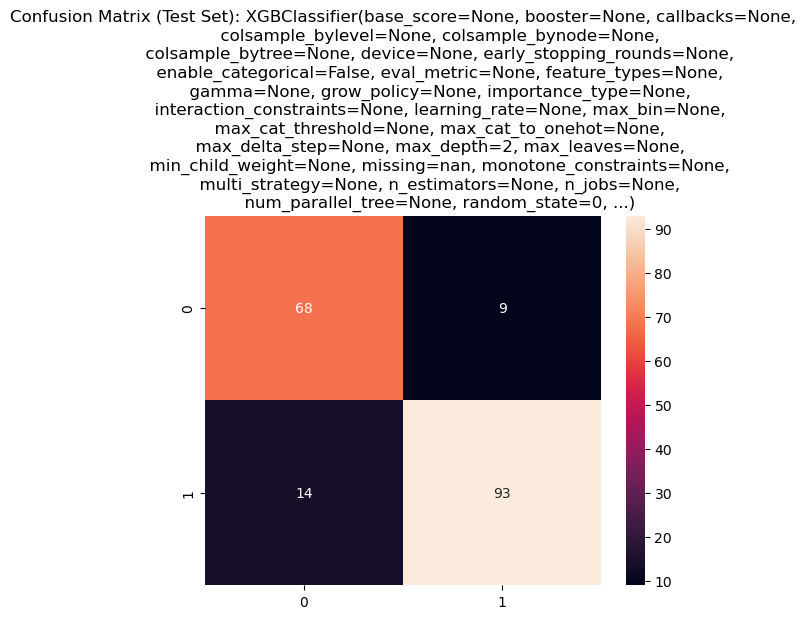

In [99]:
# XGBoost
model_xgb = xgb.XGBClassifier(max_depth= 2,random_state=0)
model_train(model_xgb)

ROC Curve Comparison

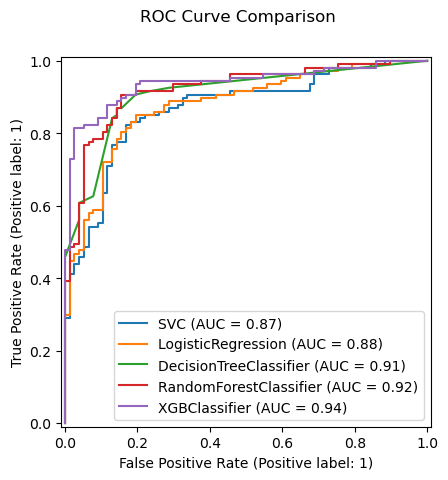

In [100]:
svc_disp = metrics.RocCurveDisplay.from_estimator(model_svc, X_test, y_test)
lr_disp = metrics.RocCurveDisplay.from_estimator(model_lr, X_test, y_test, ax=svc_disp.ax_)
tree_disp = metrics.RocCurveDisplay.from_estimator(model_dt, X_test, y_test, ax=svc_disp.ax_)
rf_disp = metrics.RocCurveDisplay.from_estimator(model_rf, X_test, y_test, ax=svc_disp.ax_)
xgb_disp = metrics.RocCurveDisplay.from_estimator(model_xgb, X_test, y_test, ax=svc_disp.ax_)

lr_disp.figure_.suptitle("ROC Curve Comparison")
plt.show()

In [101]:
# add model performance metric into new dataframe
model_performance = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

# Define the metrics for each model
logistic_regression_metrics = pd.DataFrame([{
    'Model': 'Logistic Regression',
    'Accuracy': 0.8206521739130435,
    'Precision': 0.8775510204081632,
    'Recall': 0.8037383177570093,
    'F1-Score': 0.8390243902439024,
    'ROC-AUC': 0.8239470809564267
}])

svc_metrics = pd.DataFrame([{
    'Model': 'SVC',
    'Accuracy': 0.8043478260869565,
    'Precision': 0.865979381443299,
    'Recall': 0.7850467289719626,
    'F1-Score': 0.8235294117647058,
    'ROC-AUC': 0.808107780070397
}])

dec_tree_metrics = pd.DataFrame([{
    'Model': 'Decision Tree',
    'Accuracy': 0.8532608695652174,
    'Precision': 0.8921568627450981,
    'Recall': 0.8504672897196262,
    'F1-Score': 0.8708133971291866,
    'ROC-AUC': 0.8538050734312417
}])

rf_metrics = pd.DataFrame([{
    'Model': 'Random Forest',
    'Accuracy': 0.875,
    'Precision': 0.8818181818181818,
    'Recall': 0.9065420560747663,
    'F1-Score': 0.8940092165898618,
    'ROC-AUC': 0.8688554436217989
}])

xgb_metrics = pd.DataFrame([{
    'Model': 'XGBoost',
    'Accuracy': 0.875,
    'Precision': 0.9117647058823529,
    'Recall': 0.8691588785046729,
    'F1-Score': 0.8899521531100478,
    'ROC-AUC': 0.876137880810778
}])

model_performance = pd.concat([
    logistic_regression_metrics,
    svc_metrics,
    dec_tree_metrics,
    rf_metrics,
    xgb_metrics
], ignore_index=True)

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow; color: black' if v else '' for v in is_max]

model_performance_metric = model_performance.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

# Display the styled DataFrame
model_performance_metric

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.820652,0.877551,0.803738,0.839024,0.823947
1,SVC,0.804348,0.865979,0.785047,0.823529,0.808108
2,Decision Tree,0.853261,0.892157,0.850467,0.870813,0.853805
3,Random Forest,0.875000,0.881818,0.906542,0.894009,0.868855
4,XGBoost,0.875000,0.911765,0.869159,0.889952,0.876138


## 3. Clustering

### 3.1 Customer Personality Dataset

In [102]:
df_cust = pd.read_csv('dataset/3. clustering/marketing_campaign.csv', sep='\t')
df_cust.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [103]:
check_data(df_cust)

--------------------------------------------------
There are 24 missing values in the dataset.
There are 0 duplicated values in the dataset.
--------------------------------------------------
Missing values:
Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64
-------------------------

In [104]:
len(df_cust)

2240

In [105]:
# Drop the missing values
df_cust.dropna(inplace=True)
check_data(df_cust)

--------------------------------------------------
There are 0 missing values in the dataset.
There are 0 duplicated values in the dataset.
--------------------------------------------------
